In [22]:
using Polyhedra
using GLPK
using JuMP
using Plots

In [23]:
A = [1 1; 0 1]
B = [0.5; 1]
K = [-0.6609 -1.3261]
S = A + B * K

2×2 Matrix{Float64}:
  0.66955   0.33695
 -0.6609   -0.3261

In [24]:
@show Wv = vrep([[x, y] for x in [-0.1, 0.1] for y in [-0.1, 0.1]])
lib = DefaultLibrary{Float64}(GLPK.Optimizer)
@show W = polyhedron(Wv, lib)
function Fs(s::Integer, verbose=1)
    @assert s ≥ 1
    F = W
    A_W = W
    for i in 1:(s-1)
        A_W = S * A_W
        F += A_W
        if verbose ≥ 1
            println("Number of points after adding A^$i * W: ", npoints(F))
        end
        removevredundancy!(F)
        if verbose ≥ 1
            println("Number of points after removing redundant ones: ", npoints(F))
        end
    end
    return F
end

Wv = vrep([[x, y] for x = [-0.1, 0.1] for y = [-0.1, 0.1]]) = convexhull([-0.1, -0.1], [-0.1, 0.1], [0.1, -0.1], [0.1, 0.1])
W = polyhedron(Wv, lib) = convexhull([-0.1, -0.1], [-0.1, 0.1], [0.1, -0.1], [0.1, 0.1])


Fs (generic function with 2 methods)

In [25]:
@time Fs(3)

Number of points after adding A^1 * W: 16
Number of points after removing redundant ones: 8
Number of points after adding A^2 * W: 32
Number of points after removing redundant ones: 12
  0.000687 seconds (1.15 k allocations: 54.719 KiB)


Polyhedron DefaultPolyhedron{Float64, Polyhedra.Intersection{Float64, Vector{Float64}, Int64}, Polyhedra.Hull{Float64, Vector{Float64}, Int64}}:
12-element iterator of Vector{Float64}:
 [0.03478324249999998, -0.233033515]
 [-0.0326067575, -0.167813515]
 [-0.1665167575, -0.03563351499999998]
 [-0.189661853, -0.012363705999999997]
 [-0.2347832425, 0.033033514999999986]
 [-0.2347832425, 0.233033515]
 [-0.03478324249999998, 0.233033515]
 [0.0326067575, 0.167813515]
 [0.1665167575, 0.03563351499999998]
 [0.189661853, 0.012363705999999997]
 [0.2347832425, -0.033033514999999986]
 [0.2347832425, -0.233033515]

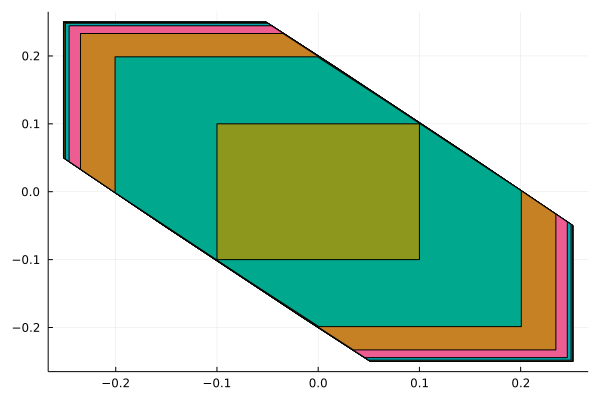

In [26]:
plot()
for i in 10:-1:1
    plot!(Fs(i, 0))
end
plot!()

In [27]:
function αo(s)
    A_W = A^s \ W
    hashyperplanes(A_W) && error("HyperPlanes not supported")
    return maximum([Polyhedra.support_function(h.a, W) / h.β for h in halfspaces(A_W)])
end
α = αo(10)

11.000000000000002

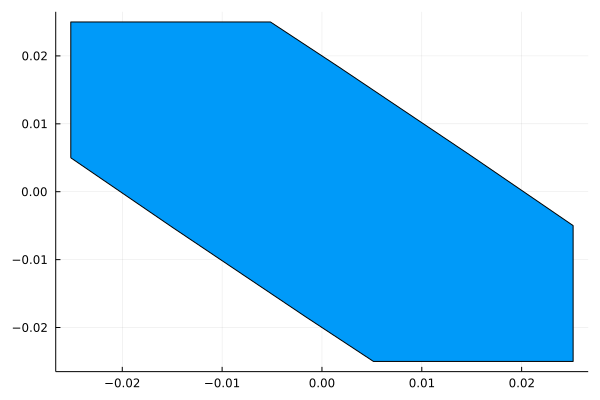

In [28]:
plot((1 - α)^(-1) * Fs(8, 0))